In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [5]:
table2= pd.read_csv("table2_total.csv")
table2=table2.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)

In [6]:
table2.head()

,Ability,Character_Class,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,matchID,playersID,score
0,0.0,Titan,25,1.0,1.833333,335,2.0,2.0,3.0,3.200000,9.0,2.000000,15.0,1459943405,2305843009283916134,32.0
1,0.0,Hunter,25,1.0,1.200000,334,0.0,0.0,2.0,1.687500,15.0,1.266667,17.0,1459943405,2305843009260473349,27.0
2,0.0,Warlock,25,1.0,0.653846,335,0.0,0.0,3.0,1.071429,13.0,0.769231,7.0,1459943405,2305843009265606964,15.0
3,0.0,Titan,25,0.0,0.406250,335,1.0,1.0,1.0,0.764706,16.0,0.437500,6.0,1459943405,2305843009264488479,13.0
4,0.0,Hunter,20,0.0,2.555556,290,1.0,1.0,12.0,3.400000,9.0,3.222222,17.0,986171745,2305843009301451364,34.0


In [7]:
table2.shape

(315940, 16)

### create new team id by combining  sorted players IDs into one string

In [8]:
#sample data first
sample=table2.head(20000)

In [10]:
sample.shape

(20000, 16)

### Sort the data by match and player first 

In [14]:
sort_dt=sample.sort_values(["matchID","playersID"]).reset_index().drop("index",axis=1)

In [15]:
sort_dt.head()

,Ability,Character_Class,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,matchID,playersID,score
0,0.0,Hunter,20,0.0,0.794118,270,1.0,0.0,13.0,1.111111,17.0,1.176471,7.0,151089348,2305843009261819479,20.0
1,0.0,Hunter,20,1.0,2.083333,270,2.0,0.0,4.0,2.076923,12.0,2.250000,23.0,151089348,2305843009262671233,27.0
2,0.0,Titan,12,0.0,0.833333,115,1.0,0.0,6.0,1.000000,12.0,1.083333,7.0,151089348,2305843009267511575,13.0
3,0.0,Warlock,20,0.0,0.923077,265,1.0,1.0,6.0,1.071429,13.0,1.153846,9.0,151089348,2305843009267512352,15.0
4,0.0,Warlock,20,0.0,2.083333,297,1.0,0.0,7.0,0.857143,6.0,2.666667,9.0,321966782,2305843009262426644,6.0


In [16]:
sort_dt.playersID = sort_dt.playersID.astype(str)

In [17]:
sort_dt.head()

,Ability,Character_Class,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,matchID,playersID,score
0,0.0,Hunter,20,0.0,0.794118,270,1.0,0.0,13.0,1.111111,17.0,1.176471,7.0,151089348,2305843009261819479,20.0
1,0.0,Hunter,20,1.0,2.083333,270,2.0,0.0,4.0,2.076923,12.0,2.250000,23.0,151089348,2305843009262671233,27.0
2,0.0,Titan,12,0.0,0.833333,115,1.0,0.0,6.0,1.000000,12.0,1.083333,7.0,151089348,2305843009267511575,13.0
3,0.0,Warlock,20,0.0,0.923077,265,1.0,1.0,6.0,1.071429,13.0,1.153846,9.0,151089348,2305843009267512352,15.0
4,0.0,Warlock,20,0.0,2.083333,297,1.0,0.0,7.0,0.857143,6.0,2.666667,9.0,321966782,2305843009262426644,6.0


In [25]:
sample_team=sort_dt.groupby(by="matchID").agg({"playersID":"sum"}).reset_index()
sample_team.head()

,matchID,playersID
0,151089348,2305843009261819479230584300926267123323058430...
1,321966782,2305843009262426644230584300926255208423058430...
2,322134592,2305843009262896578230584300926416179323058430...
3,322284911,2305843009260404163230584300926171736023058430...
4,322667463,2305843009262426644230584300926255208423058430...


In [26]:
len(sample_team.matchID.unique())

4982

In [27]:
len(sample_team.playersID.unique())

3424

### Try to generate a full team list 

In [29]:
sort_table2=table2.sort_values(["matchID","playersID"]).reset_index().drop("index",axis=1)

In [30]:
sort_table2.head()

,Ability,Character_Class,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,matchID,playersID,score
0,0.0,Titan,2,0.0,1.222222,21,0.0,0.0,2.0,2.000000,9.0,1.333333,10.0,9670133,2305843009262985436,20.0
1,0.0,Warlock,2,0.0,0.562500,297,0.0,2.0,6.0,1.000000,16.0,0.750000,6.0,9670133,2305843009263433983,17.0
2,0.0,Hunter,2,0.0,0.409091,22,0.0,0.0,1.0,0.916667,11.0,0.454545,4.0,9670133,2305843009264405328,11.0
3,0.0,Hunter,2,0.0,0.375000,22,0.0,1.0,0.0,0.823529,16.0,0.375000,6.0,9670133,2305843009265355378,14.0
4,0.0,Titan,3,0.0,1.312500,23,0.0,0.0,8.0,0.117647,16.0,1.562500,17.0,10553188,2305843009262985436,2.0


In [31]:
sort_table2.playersID = sort_table2.playersID.astype(str)

In [32]:
teamid=sort_table2.groupby(by="matchID").agg({"playersID":"sum"}).reset_index()
teamid.head()

,matchID,playersID
0,9670133,2305843009262985436230584300926343398323058430...
1,10553188,2305843009262985436230584300926343398323058430...
2,28767658,2305843009261106631230584300926281695123058430...
3,42938381,2305843009260451213230584300926108825823058430...
4,45057385,2305843009263318286230584300926467788023058430...


In [33]:
print(len(teamid.matchID.unique()))
print(len(teamid.playersID.unique()))

76717
54081


In [50]:
count_list=teamid["playersID"].value_counts()

In [51]:
len(count_list)

54081

In [55]:
sum(count_list>5)

1105

In [65]:
count_dt=pd.DataFrame(teamid["playersID"].value_counts()).reset_index()
count_dt.columns=['teamid', 'team_counts']
count_dt.head()

,teamid,team_counts
0,2305843009263831955230584300926469132423058430...,16
1,2305843009260404781230584300926408879223058430...,16
2,2305843009266442867230584300926957830223058430...,16
3,2305843009261091921230584300926200371223058430...,15
4,2305843009261060319230584300926166251723058430...,15


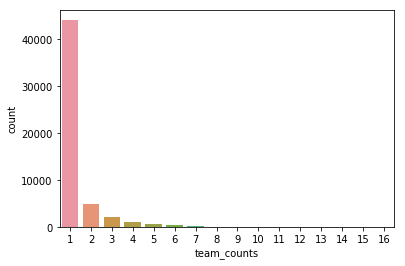

In [67]:
sns.countplot(x="team_counts", data=count_dt)

In [62]:
count_dt.columns

Index(['index', 'playersID'], dtype='object')

In [69]:
#how many team who have played equal or more than three times?
len(count_dt[count_dt["team_counts"]>=3])

5091

### Generate a team id list with match id 

In [71]:
teamid.columns=["matchID","teamID"]

In [72]:
teamid.head()

,matchID,teamID
0,9670133,2305843009262985436230584300926343398323058430...
1,10553188,2305843009262985436230584300926343398323058430...
2,28767658,2305843009261106631230584300926281695123058430...
3,42938381,2305843009260451213230584300926108825823058430...
4,45057385,2305843009263318286230584300926467788023058430...


In [74]:
teamid.to_csv("teamid.csv",index=False,)